In [20]:
import PIL
from PIL import Image
import imagehash

import pycamhd.pycamhd as camhd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xar
import urllib as url

movLink = "https://rawdata.oceanobservatories.org/files/RS03ASHS/PN03B/06-CAMHDA301/2017/03/12/CAMHDA301-20170312T181500.mov"
movAtom = camhd.get_moov_atom(movLink)
frameTotal = camhd.get_frame_count(movLink, movAtom) 
frames = range(0,frameTotal,200)
#print(frameTotal)                        26983

def diff_letters(a,b):
    if (len(a) != len(b)):
        return -1
    else:
        return sum ( a[i] != b[i] for i in range(len(a)) )

In [ ]:
avgFrameHashes = []
avgFrameIntHashes = []

for i in frames:
    
    frame = camhd.get_frame(movLink, i)
    im = Image.fromarray(frame)
    hash = imagehash.average_hash(im)
    print(hash)
    avgFrameHashes.append(hash)
    intHash = hash.__hash__()
    print(intHash)
    avgFrameIntHashes.append(intHash)

In [ ]:
pFrameHashes = []
pFrameIntHashes = []

for i in frames:
    
    frame = camhd.get_frame(movLink, i)
    im = Image.fromarray(frame)
    hash = imagehash.phash(im)
    print(hash)
    pFrameHashes.append(hash)
    intHash = hash.__hash__()
    print(intHash)
    pFrameIntHashes.append(intHash)

In [ ]:
dFrameHashes = []
dFrameIntHashes = []

for i in frames:
    
    frame = camhd.get_frame(movLink, i)
    im = Image.fromarray(frame)
    hash = imagehash.dhash(im)
    print(hash)
    dFrameHashes.append(hash)
    intHash = hash.__hash__()
    print(intHash)
    dFrameIntHashes.append(intHash)

In [4]:
wFrameHashes = []
wFrameIntHashes = []

for i in frames:
    
    frame = camhd.get_frame(movLink, i)
    im = Image.fromarray(frame)
    hash = imagehash.whash(im)
    print(hash)
    wFrameHashes.append(hash)
    intHash = hash.__hash__()
    print(intHash)
    wFrameIntHashes.append(intHash)

0000000000000000
0
0000000000000000
0
0000000000000000
0
07070f0e1f6bf1e1
1540
07070f1e1f6af1e1
1420
07070f1e1f6bf1c1
1544
060e4fef6707070f
1615
070fefcfc7070303
1789
07070f1e1f2f71e1
1577
040c6eef4fcf0f06
1266
040c6eef4f4f0f07
1393
040c6eef4f4f0f07
1393
040c6eef4f4f0f07
1393
040c6eef4f4f0f07
1393
000e1f1f1f1f1f0f
1592
00002f3f3f3f1f0f
1488
00002f3f3f1f1f1f
1492
06075f7f3f170702
1596
060f7f7f3f070302
1576
060f7f7f3f070302
1576
060f4f7f3f0f0702
1612
00070f3f1f1f0f1f
1700
00002f3f3f3f1f0f
1488
00060f3f3f1f1f0f
1576
00243c7e3e7e3e47
822
042c6eef4f8f0f06
1268
00206e7e7e6e6f07
962
00003e3e3e7e7e7c
686
00003e3e3e7e7e7c
686
40626f6fe7670326
1317
e2c7dfcfaea20300
1170
253d2f2f2f2e4c0c
1298
253d3d2f2f6e0c0c
1242
273f3d2f2d6c0c0c
1242
353f2d2f2d6e0c0c
1242
373f2d2f2f6e0808
1306
373f2d2f2d2e0c0c
1304
b6bf2d2f2f2f0800
1290
00213f3f7747c6c6
1298
00003e3e3e7e7e7c
686
00243c7c7e7c7e6c
526
040c6eef4f4f0f07
1393
040c6eef4f8f0f07
1392
00a0e8fc7cfc7c5c
336
00003c7c7cfcfcfc
373
00003c7c7cfcfcfc
373
81c16f

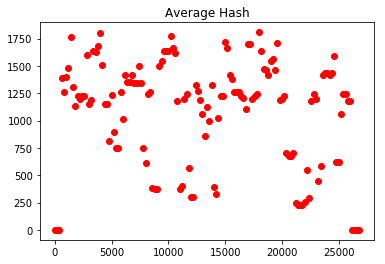

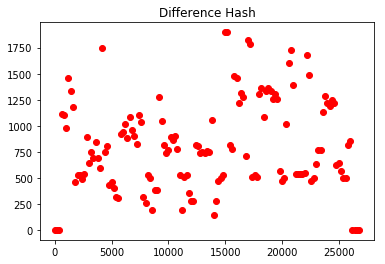

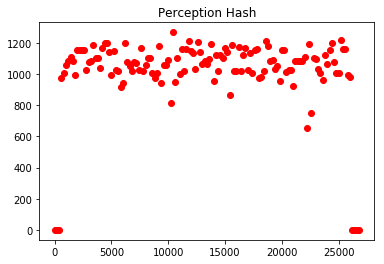

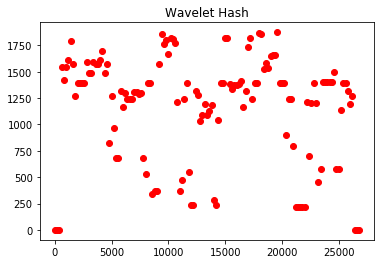

In [17]:
plt.plot(frames,avgFrameIntHashes,"ro")
plt.title("Average Hash")
plt.show()

plt.plot(frames,dFrameIntHashes,"ro")
plt.title("Difference Hash")
plt.show()

plt.plot(frames,pFrameIntHashes,"ro")
plt.title("Perception Hash")
plt.show()

plt.plot(frames,wFrameIntHashes,"ro")
plt.title("Wavelet Hash")
plt.show()

In [19]:
wStrHashBin = []
wStrHashBinDiff = []

for i in wFrameHashes:
    wStrHashBin.append(((bin(int(str(i), 16))))[2:].zfill(64))

index = 0
while index < len(wFrameHashes) - 1:
    diffCount = diff_letters(wStrHashBin[index], wStrHashBin[index + 1])
    wStrHashBinDiff.append(diffCount)
    print(diffCount)
    index += 1

0
0
32
2
2
28
10
22
30
2
0
0
0
16
8
2
16
4
0
4
12
8
4
16
22
16
14
0
28
22
30
4
4
4
4
4
8
28
20
8
26
2
30
10
0
34
14
18
6
6
6
2
2
22
30
6
26
6
26
16
2
38
16
18
2
4
4
4
20
38
6
32
12
0
20
0
14
26
20
2
2
2
6
26
20
4
20
6
0
14
10
18
2
6
6
2
0
18
18
2
0
28
32
0
14
20
0
0
0
0
24
20
38
6
16
34
4
32
0
0
0
0
10
32
0
28
14
0
30
2
38
32
0
0


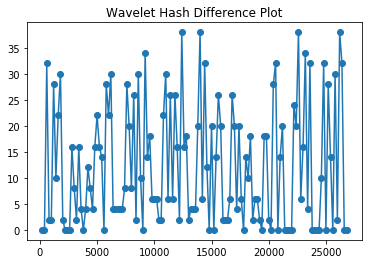

In [25]:
plt.plot(frames[1:], wStrHashBinDiff, "-o")
plt.title("Wavelet Hash Difference Plot")
plt.show()